In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [70]:
B = 200
N = 20
np.random.seed(2)
X = np.random.randn(N)
X

array([-0.41675785, -0.05626683, -2.1361961 ,  1.64027081, -1.79343559,
       -0.84174737,  0.50288142, -1.24528809, -1.05795222, -0.90900761,
        0.55145404,  2.29220801,  0.04153939, -1.11792545,  0.53905832,
       -0.5961597 , -0.0191305 ,  1.17500122, -0.74787095,  0.00902525])

In [71]:
print ("Sample mean of X : " + str(X.mean()))
print("Std of X : " + str(X.std()))

Sample mean of X : -0.20931498826527592
Std of X : 1.0868472302080328


In [72]:
individual_estimates = np.empty(B)

In [73]:
for b in range(0,B):
    samples = np.random.choice(X, size = N)
    
    individual_estimates[b] = samples.mean()

In [74]:
b_estimate = individual_estimates.mean()
b_std = individual_estimates.std()
b_lower_bound = b_estimate + norm.ppf(0.025)*b_std/np.sqrt(B)
b_upper_bound = b_estimate + norm.ppf(0.975)*b_std/np.sqrt(B)

print(b_estimate, b_std, lower_bound, upper_bound)

-0.1885420790625253 0.24376409973393262 -0.6814049528896208 0.2770019528492331


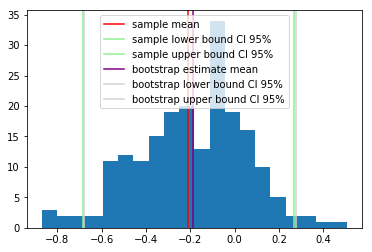

In [75]:
plt.hist(individual_estimates, bins = 20)
plt.axvline(X.mean(), color = "red", label = 'sample mean')
plt.axvline(X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N), color = "lightgreen", label = "sample lower bound CI 95%")
plt.axvline(X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N), color = "lightgreen", label = "sample upper bound CI 95%")


plt.axvline(b_estimate, color = "purple", label = "bootstrap estimate mean")
plt.axvline(lower_bound, color = "lightgrey", label = "bootstrap lower bound CI 95%")
plt.axvline(upper_bound, color = "lightgrey", label = "bootstrap upper bound CI 95%")
plt.legend()
plt.show()